In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets
linnerud = datasets.load_linnerud()
dfexercise = pd.DataFrame(linnerud.data, columns = linnerud.feature_names)
dfphysiology = pd.DataFrame(linnerud.target, columns = ['Weight','Waist','Pulse'])
dfgym =  pd.concat([dfexercise,dfphysiology], axis =  'columns')
dfgym.head()

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0


Text(0, 0.5, 'Waist Size')

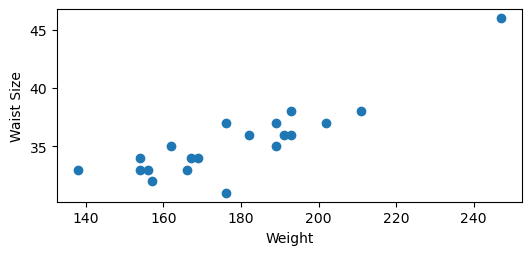

In [3]:
plt.figure(dpi=100, figsize = (6,2.5))
plt.scatter(dfgym.Weight, dfgym.Waist)
plt.xlabel('Weight')
plt.ylabel('Waist Size')

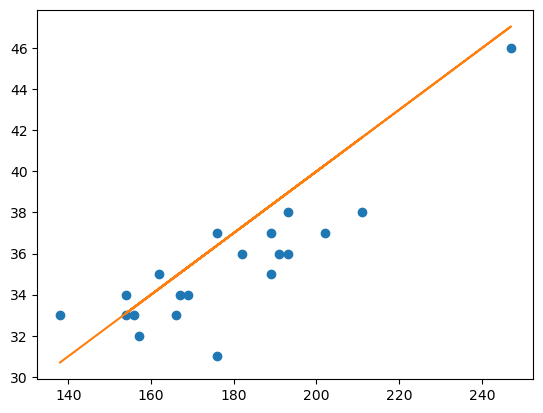

In [4]:
#y = b1*x1 + b2*x2 + ... + b0
m = .15
b = 10
x = dfgym.Weight
y = m*x+b
plt.figure()
plt.scatter(dfgym.Weight, dfgym.Waist)
plt.plot(x,y,c='C1')

In [5]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00616/Tetuan%20City%20power%20consumption.csv')

In [6]:
subset1_gini = .330
subset1_n = 123
subset2_gini = .194
subset2_n = 900
total_gini = (subset1_gini*subset1_n+subset2_gini*subset2_n)/(subset1_n+subset2_n)
total_gini

0.21035190615835778

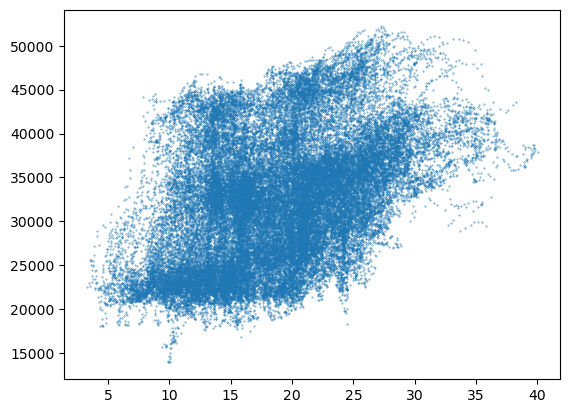

In [7]:
plt.scatter(df.Temperature,df['Zone 1 Power Consumption'],s=.1)

In [8]:
from sklearn import linear_model,model_selection
xval = model_selection.KFold(10,shuffle = True)
model = linear_model.LinearRegression()
features = ['Temperature','Humidity']
x = df[features]
y = df['Zone 1 Power Consumption']
results = model_selection.cross_validate(model,x,y, cv = xval, return_train_score=True,scoring='r2')
results

{'fit_time': array([0.00607467, 0.00338316, 0.00549817, 0.0125401 , 0.00380373,
        0.00305414, 0.00305176, 0.00498199, 0.00297809, 0.00300002]),
 'score_time': array([0.01475215, 0.0047071 , 0.00572491, 0.00841308, 0.03364015,
        0.00319886, 0.02198696, 0.00173998, 0.00083566, 0.00154495]),
 'test_score': array([0.19321409, 0.19029293, 0.20618057, 0.20520461, 0.20591561,
        0.22327513, 0.20254784, 0.20383021, 0.20452943, 0.18990213]),
 'train_score': array([0.20393287, 0.20426659, 0.20256111, 0.20260131, 0.20257285,
        0.20055429, 0.20296055, 0.20277061, 0.20272473, 0.20427862])}

In [9]:
y_true = [1.6,2.2,2.2,1.5]
y_pred = [1.5,1.9,2.3,1.4]
sum_diffs = 0
for i in range(len(y_true)):
    diff = y_true[i] - y_pred[i]
    sum_diffs += diff**2
mean_diff = sum_diffs/len(y_pred)
np.sqrt(mean_diff) #RMSE

0.1732050807568878

In [11]:
bsdf = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv',encoding_errors='ignore')
bsdf.head()

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


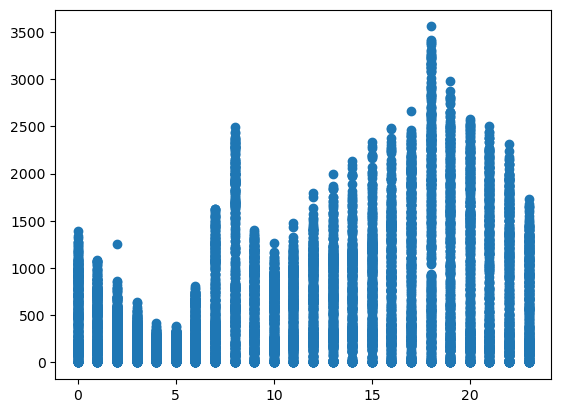

In [12]:
plt.figure()
plt.scatter(bsdf.Hour,bsdf['Rented Bike Count'])


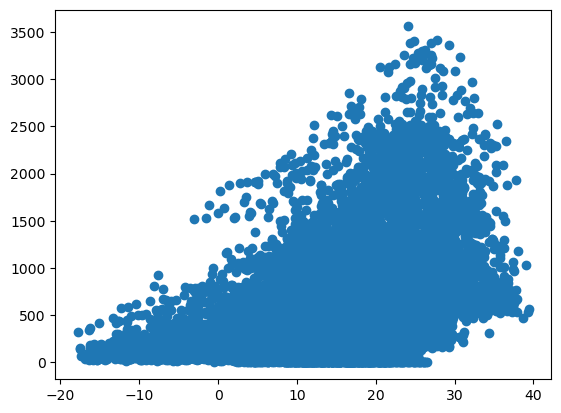

In [14]:
plt.scatter(bsdf['Temperature(C)'],bsdf['Rented Bike Count'])

In [16]:
xval = model_selection.KFold(10,shuffle=True)
model = linear_model.LinearRegression()
features = ['Temperature(C)','Hour']
X = bsdf[features]
y = bsdf['Rented Bike Count']
results = model_selection.cross_validate(model,X,y,scoring='r2',cv=xval,return_train_score=True)
results

{'fit_time': array([0.00363684, 0.00872087, 0.00185299, 0.00160718, 0.00197005,
        0.00221682, 0.00643611, 0.00197673, 0.00268197, 0.00962472]),
 'score_time': array([0.00164723, 0.00140285, 0.00078106, 0.00082994, 0.00085807,
        0.00086713, 0.00095677, 0.00486398, 0.00144601, 0.0010612 ]),
 'test_score': array([0.40921738, 0.39231477, 0.39273376, 0.39592723, 0.38801432,
        0.43453998, 0.41981675, 0.44833345, 0.37662632, 0.43651691]),
 'train_score': array([0.40983982, 0.41150383, 0.41150682, 0.41134009, 0.4121604 ,
        0.40691474, 0.40874627, 0.40573127, 0.41401392, 0.40664248])}

In [18]:
print(results['test_score'].mean())
print(results['test_score'].std())
print(results['train_score'].mean())

0.40940408846121584
0.0229659445250116
0.40983996352522284


In [19]:
predictions = model_selection.cross_val_predict(model,X,y,cv=xval)
predictions

array([-157.12804806, -129.86368137, -110.60705572, ...,  742.02932788,
        750.35528101,  786.21228803])

Text(0, 0.5, 'Predicted')

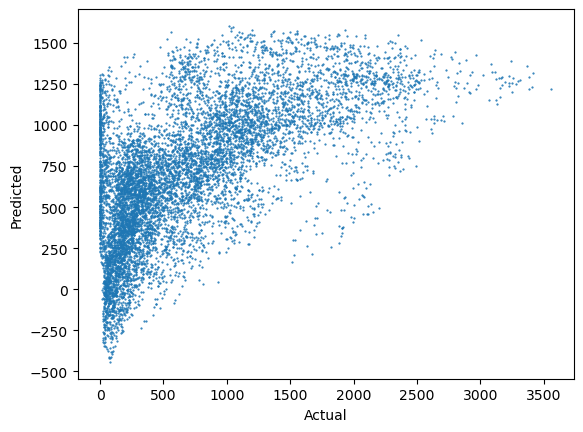

In [22]:
plt.scatter(y,predictions,s=0.3)
plt.xlabel('Actual')
plt.ylabel('Predicted')

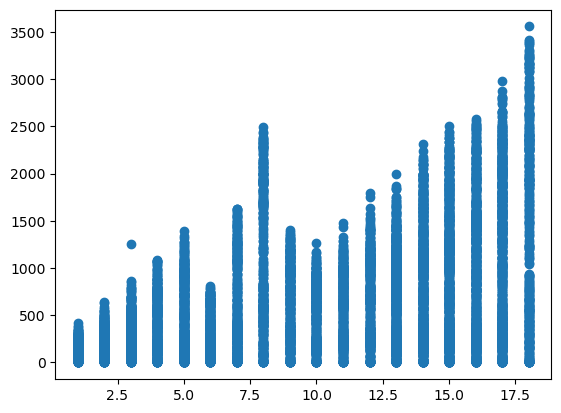

In [24]:
bsdf['middle_hours'] = bsdf.Hour.apply(lambda x:x if x>= 5 and x <= 18 else (18+18-x if x >18 else 5-x))
plt.scatter(bsdf.middle_hours, bsdf['Rented Bike Count'])

In [27]:
model = linear_model.LinearRegression()
features = ['middle_hours','Temperature(C)']
X = bsdf[features]
y = bsdf['Rented Bike Count']
results = model_selection.cross_validate(model,X,y,scoring='r2',cv=xval,return_train_score=True)
print(results['test_score'].mean())
print(results['test_score'].std())
print(results['train_score'].mean())

0.4418349871333668
0.017609199439039908
0.4432592857971865
